In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import copy
import matplotlib.pyplot as plt
import glob
from pathlib import Path
import os
import plotly.express as px

In [2]:
# work_dir=Path("/scratch/fransjevanoors/global_sr")
work_dir=Path("/mnt/u/LSM root zone/global_sr")

In [3]:
f = f'{work_dir}/output/catchment_characteristics/catchment_characteristics_gswp-p_gleam-ep_gswp-t.csv'
df = pd.read_csv(f,index_col=0)

In [4]:
df

,p_mean,ep_mean,q_mean,t_mean,ai,hai,tdiff_max,tdiff_mean,idu_mean,idu_max,...,slp_mean,slp_max,slp_min,slp_std,cla,snd,slt,tpi,lat,lon
de_0000778,4.045309,2.057641,0.842493,7.638991,1.965994,0.337366,24.641665,20.637500,2.86,16.13,...,10.619948,33.791851,0.403270,7.677587,7.574111,11.43850,15.163390,1.40614,47.723927,11.933343
br_0001850,4.186528,2.943133,1.030596,25.107997,1.422473,0.967762,6.181352,4.359281,7.14,72.03,...,2.404713,19.018690,0.036460,1.452261,21.465250,30.03281,11.571600,3.32628,-16.616687,-49.718967
ca_0003156,1.235331,1.331096,0.017540,3.742158,0.928056,1.003734,43.900205,36.056585,5.33,30.03,...,0.353077,4.675838,0.000000,0.412188,13.336140,18.63596,17.658500,3.64355,49.506681,-103.275867
br_0001299,3.123837,2.907271,1.032392,24.338485,1.074491,1.257753,6.634216,5.093589,4.47,24.80,...,4.164966,21.969494,0.126978,2.651690,14.335770,22.00644,6.715627,2.06243,-17.108293,-39.967427
br_0001843,4.453621,2.944259,1.377108,24.223189,1.512646,0.877896,6.469796,4.538261,7.15,73.73,...,2.582996,10.657210,0.153662,1.180128,18.867120,24.71507,9.273455,2.71033,-16.539263,-49.184522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ca_0001384,3.196726,1.852481,2.053996,2.880652,1.725645,0.341004,40.004254,33.168757,2.74,11.63,...,3.745704,19.904703,0.002320,2.461829,5.288717,22.22545,15.004920,2.14825,47.253879,-72.245291
us_0001647,3.412146,2.749842,2.050785,18.061075,1.240852,0.855017,24.183295,20.816630,4.07,18.73,...,0.838095,1.561405,0.154006,0.249567,12.236070,35.50068,15.771400,3.79075,33.018864,-83.604070
gb_0000044,2.269773,1.157692,1.016338,9.472414,1.960603,0.677501,17.949959,13.999706,3.36,17.43,...,2.210624,7.841141,0.187004,1.120093,14.062060,22.81675,27.029190,3.33438,53.261171,-1.396872
br_0000392,4.171185,3.215613,1.172224,25.953768,1.297166,1.004279,4.744549,3.214524,9.28,87.60,...,2.312693,26.799967,0.000000,2.562056,15.720090,32.02823,10.318910,3.27995,-12.531370,-47.860721


In [5]:
#Identify the columns that should be part of the PCA-Plots
columns = ['p_mean','ep_mean','t_mean','ai','idu_mean']
df_sel = df[columns].dropna() # select columns for PCA

x = StandardScaler().fit_transform(df_sel) #standardize the values in columns to mean=0
x = pd.DataFrame(x, columns=columns)

x

,p_mean,ep_mean,t_mean,ai,idu_mean
0,0.752903,-0.094068,-0.600713,0.566929,-0.647592
1,0.857766,1.132628,1.509826,-0.105590,0.731660
2,-1.333660,-1.100571,-1.071514,-0.717351,0.148378
3,0.068660,1.082946,1.416857,-0.536161,-0.128761
4,1.056098,1.134187,1.402927,0.005985,0.734883
...,...,...,...,...,...
8641,0.122784,-0.378281,-1.175598,0.269537,-0.686263
8642,0.282745,0.864856,0.658444,-0.330317,-0.257663
8643,-0.565530,-1.340792,-0.379206,0.560258,-0.486464
8644,0.846373,1.510101,1.612009,-0.260637,1.421286


In [6]:
#Performing the PCA using the PCA model function from sklearn ; https://medium.com/data-science-365/principal-component-analysis-pca-with-scikit-learn-1e84a0c731b0
pca_5 = PCA(n_components=5) #pca with 5 dimensions to see how well pca captures the variance of the data
pca_5.fit(x)
x_pca_5 = pca_5.transform(x)

In [7]:
print('variance explained by all 5 principal components=',sum(pca_5.explained_variance_ratio_ * 100)) # this should be 100% because we include all variables

variance explained by all 5 principal components= 100.0


In [8]:
a = pca_5.explained_variance_ratio_
print('the variance explained by variable:')
print(columns[0], a[0])
print(columns[1], a[1])
print(columns[2], a[2])
print(columns[3], a[3])
print(columns[4], a[4])

the variance explained by variable:
p_mean 0.4717537053601009
ep_mean 0.3417166719021876
t_mean 0.13694083668977067
ai 0.03608506231635756
idu_mean 0.013503723731583265


Text(0, 0.5, 'explained variance')

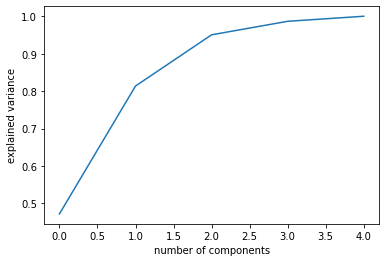

In [9]:
plt.plot(np.cumsum(pca_5.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('explained variance')

In [10]:
#Performing the PCA using the PCA model function from sklearn ; https://medium.com/data-science-365/principal-component-analysis-pca-with-scikit-learn-1e84a0c731b0
pca_2 = PCA(n_components=2) #pca with 2 dimensions to see how well pca captures the variance of the data
pca_2.fit(x)
x_pca_2 = pca_2.transform(x)

In [11]:
print('variance explained by 2 principal components=',sum(pca_2.explained_variance_ratio_ * 100)) # this should be 100% because we include all variables

variance explained by 2 principal components= 81.34703772622885


In [12]:
a = pca_2.explained_variance_ratio_
print('the variance explained by variable:')
print(columns[0], a[0])
print(columns[1], a[1])

the variance explained by variable:
p_mean 0.47175370536010097
ep_mean 0.3417166719021874


Text(0, 0.5, 'explained variance')

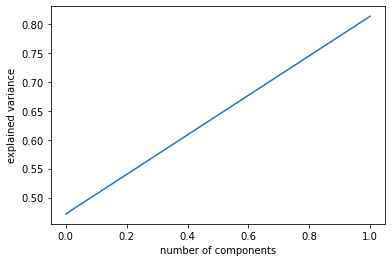

In [13]:
plt.plot(np.cumsum(pca_2.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('explained variance')

Text(0, 0.5, 'PC2')

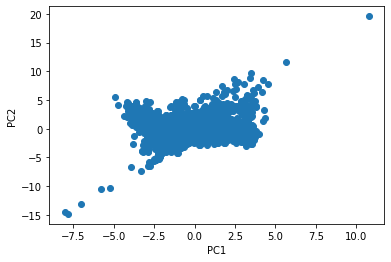

In [14]:
plt.scatter(x_pca_2[:,0],x_pca_2[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')

In [15]:
#Performing the PCA using the PCA model function from sklearn ; https://medium.com/data-science-365/principal-component-analysis-pca-with-scikit-learn-1e84a0c731b0
pca_95 = PCA(n_components=0.95) #pca with x dimensions so that we describe 95% of the variance to see how well pca captures the variance of the data
pca_95.fit(x)
x_pca_95 = pca_95.transform(x)

In [16]:
print('95% of the variance explained by # principal components=',x_pca_95.shape[1]) # this should be 100% because we include all variables

95% of the variance explained by # principal components= 3


In [65]:
columns = ['p_mean','ep_mean','t_mean','si_p']
df_sel = df[columns].dropna() # select columns for PCA

x = StandardScaler().fit_transform(df_sel) #standardize the values in columns to mean=0
x = pd.DataFrame(x, columns=columns)

x

,p_mean,ep_mean,t_mean,si_p
0,0.752903,-0.094068,-0.600713,-0.434227
1,0.857766,1.132628,1.509826,1.557881
2,-1.333660,-1.100571,-1.071514,0.634418
3,0.068660,1.082946,1.416857,-0.089368
4,1.056098,1.134187,1.402927,1.566060
...,...,...,...,...
8641,0.122784,-0.378281,-1.175598,-0.634422
8642,0.282745,0.864856,0.658444,-0.749959
8643,-0.565530,-1.340792,-0.379206,-0.912599
8644,0.846373,1.510101,1.612009,1.613366


In [75]:
pca = PCA(n_components=2)
components = pca.fit_transform(x)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# components = pca.fit_transform(X)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Create dataframe
pca_df = pd.DataFrame(data=components[:,0:2],columns=['PC1', 'PC2'])

In [76]:
loadings

array([[ 0.61238799,  0.7113541 ],
       [ 0.94981173,  0.05162552],
       [ 0.92947668, -0.06339818],
       [ 0.65055611, -0.65441258]])

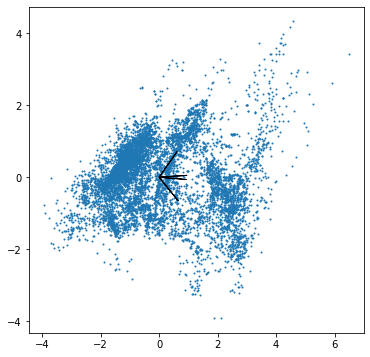

In [77]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax.scatter(pca_df.PC1,pca_df.PC2,s=1)
for i in range(len(columns)):
    ax.arrow(x=0,y=0,dx=loadings[i,0],dy=loadings[i,1],shape='full')
    # ax.annotate(columns[i],(loadings[i,0],loadings[i,1]))


In [24]:
df = df
features = columns
X = df[features]

pca = PCA(n_components=2)
components = pca.fit_transform(X)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig = px.scatter(components, x=0, y=1)

for i, feature in enumerate(features):
    fig.add_annotation(
        ax=0, ay=0,
        axref="x", ayref="y",
        x=loadings[i, 0],
        y=loadings[i, 1],
        showarrow=True,
        arrowsize=2,
        arrowhead=2,
        xanchor="right",
        yanchor="top"
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
        yshift=5,
    )
fig.show()

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [23]:
df = pd.read_csv(f,index_col=0)
df = df.dropna()
features = ['p_mean','ep_mean','t_mean','ai','tdiff_max','slp_mean','el_mean','si_p','si_ep']
X = df[features]
X = StandardScaler().fit_transform(X) #standardize all values
X = pd.DataFrame(X,columns=features)

pca = PCA(n_components=9)
components = pca.fit_transform(X)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
 
# Create dataframe
pca_df = pd.DataFrame(data=components[:,0:2],columns=['PC1', 'PC2'])

In [24]:
pca_df_scaled = pca_df.copy()
 
scaler_df = pca_df[['PC1', 'PC2']]
scaler = 1 / (scaler_df.max() - scaler_df.min())
 
for index in scaler.index:
    pca_df_scaled[index] *= scaler[index]
 
pca_df_scaled

,PC1,PC2
0,-0.052475,0.082496
1,0.304863,-0.010878
2,-0.269558,-0.114378
3,0.220664,-0.016619
4,0.302555,-0.000043
...,...,...
7891,-0.195808,0.044350
7892,0.072096,0.011938
7893,-0.152355,0.053210
7894,0.348752,-0.016537


In [25]:
per_var  = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
per_var

array([47.8, 20.4, 18.9,  5.2,  3.6,  2.7,  0.7,  0.5,  0.3])

Text(0, 0.5, 'PC2')

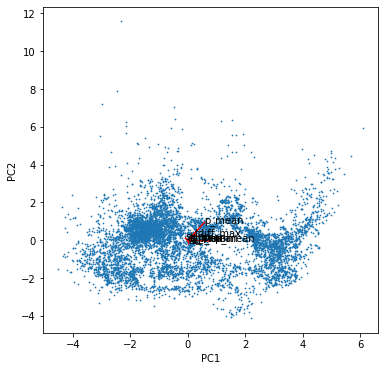

In [26]:
xs = loadings[0]
ys = loadings[1]

fig=plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax.scatter(pca_df.PC1,pca_df.PC2,s=0.5)

for i, varnames in enumerate(features):
#     plt.scatter(xs[i], ys[i], s=200)
    ax.arrow(
        0, 0, # coordinates of arrow base
        xs[i], # length of the arrow along x
        ys[i], # length of the arrow along y
        color='r',
        head_width=0.02
        )
    ax.text(xs[i], ys[i], varnames)
    
# xticks = np.linspace(-0.8, 0.8, num=5)
# yticks = np.linspace(-0.8, 0.8, num=5)
# ax.set_xticks(xticks)
# ax.set_yticks(yticks)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

In [ ]:
#Identify the number of clusters
kmeans = KMeans(6)
kmeans.fit(x_pca)

#Identify the clusters
identified_clusters = kmeans.fit_predict(x_pca)
labels = kmeans.labels_

data_with_clusters = x_pca.copy()
data_with_clusters['Clusters'] = identified_clusters